In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [7]:
df=pd.read_csv('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [26]:
x=df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']].values
x[0:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01],
       [1.142e+01, 2.038e+01, 7.758e+01, 3.861e+02, 1.425e-01],
       [2.029e+01, 1.434e+01, 1.351e+02, 1.297e+03, 1.003e-01]])

In [27]:
y=df['diagnosis'].values
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [28]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print("Train data is ",x_train.shape,y_train.shape)
print("Test data is ",x_test.shape,y_test.shape)

Train data is  (455, 5) (455,)
Test data is  (114, 5) (114,)


In [34]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
ks=454
mean_acc=np.zeros((ks-1))
ConfustionMx = [];
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
mean_acc

array([0.9122807 , 0.88596491, 0.93859649, 0.9122807 , 0.9122807 ,
       0.9122807 , 0.92105263, 0.9122807 , 0.9122807 , 0.9122807 ,
       0.9122807 , 0.9122807 , 0.92982456, 0.92982456, 0.93859649,
       0.93859649, 0.94736842, 0.92982456, 0.92105263, 0.92982456,
       0.92982456, 0.92982456, 0.92982456, 0.92982456, 0.92105263,
       0.92105263, 0.92982456, 0.92105263, 0.92105263, 0.92105263,
       0.92982456, 0.92105263, 0.92982456, 0.92105263, 0.93859649,
       0.92105263, 0.94736842, 0.93859649, 0.94736842, 0.93859649,
       0.93859649, 0.93859649, 0.94736842, 0.94736842, 0.94736842,
       0.93859649, 0.93859649, 0.93859649, 0.92982456, 0.92982456,
       0.92982456, 0.92982456, 0.92982456, 0.92982456, 0.92982456,
       0.92982456, 0.92982456, 0.93859649, 0.94736842, 0.95614035,
       0.93859649, 0.95614035, 0.93859649, 0.94736842, 0.94736842,
       0.94736842, 0.93859649, 0.93859649, 0.93859649, 0.93859649,
       0.94736842, 0.94736842, 0.94736842, 0.94736842, 0.93859

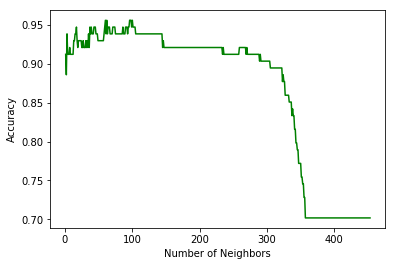

In [40]:
plt.plot(range(1,ks),mean_acc,'g')
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors")
plt.show()

In [41]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.956140350877193 with k= 60


In [55]:
neigh=KNeighborsClassifier(n_neighbors=60).fit()
neigh.predict([[7.76,22.39,14.0,189.0,0.0456]])

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [47]:
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1
